In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ns=100
ntau=300
dstep=3./ns
sar=np.arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=np.arange(0.,20.,dtaustep)
ystau=np.zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=np.arange(0.,12.,dtstep)

def func(t):
    return np.sin(t**2)

def morlet(t,sigma):
    psi=np.exp(2.*np.pi*t*1j)*np.exp(-t*t/2./sigma/sigma)
    return psi

yarr=np.zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./np.sqrt(sar[idexs])*sum(np.conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

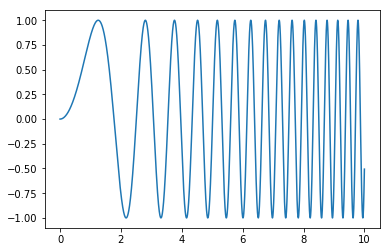

In [3]:
## signal generation for 0<t<10

x = np.linspace(0,10,10**5)
signal = func(x)
plt.plot(x,signal)
plt.show()

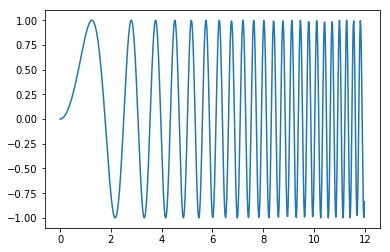

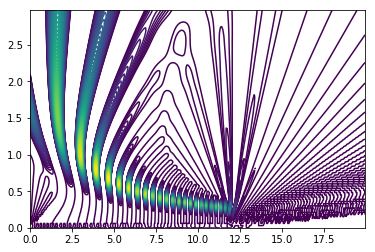

In [4]:
fig = plt.figure()
plt.plot(tar,yarr)  
fig = plt.figure()
levels=np.arange(abs(np.transpose(ystau)).min(),abs(np.transpose(ystau)).max(),(abs(np.transpose(ystau)).max() - abs(np.transpose(ystau)).min())/100.)
GW=plt.contour(tauar, sar, ystau.imag, levels=levels)
plt.show()
plt.show()